<a href="https://colab.research.google.com/github/guntsvzz/CP_Project/blob/main/EEG_Stress_LSTM_Data_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!unzip '/content/clean_exp16 2.zip'
!mv '/content/clean_exp16' 'Cleaned_signal'

Archive:  /content/clean_exp16 2.zip
   creating: clean_exp16/
  inflating: __MACOSX/._clean_exp16  
  inflating: clean_exp16/PSS10 - Sheet1.csv  
  inflating: __MACOSX/clean_exp16/._PSS10 - Sheet1.csv  
  inflating: clean_exp16/clean_exp8.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp8.csv  
  inflating: clean_exp16/clean_exp9.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp9.csv  
  inflating: clean_exp16/clean_exp7.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp7.csv  
  inflating: clean_exp16/clean_exp15.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp15.csv  
  inflating: clean_exp16/clean_exp14.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp14.csv  
  inflating: clean_exp16/clean_exp6.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp6.csv  
  inflating: clean_exp16/clean_exp4.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp4.csv  
  inflating: clean_exp16/clean_exp16.csv  
  inflating: __MACOSX/clean_exp16/._clean_exp16.csv  
  inflating: clean_exp16/clean

In [ ]:
!gdown --id 1BE2-swwhyXr2VfJ-QyKNSBbyGfqJvHGs

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BE2-swwhyXr2VfJ-QyKNSBbyGfqJvHGs
To: /content/clean_exp16 2.zip
100% 121M/121M [00:00<00:00, 260MB/s]


In [ ]:
pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 9.6 MB/s 


In [ ]:
pip install components

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pickle
import numpy as np
import os
import mne
import pandas as pd
pickle.format_version

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms  
from torch.utils.data import DataLoader, Dataset  
from torch.utils.data import TensorDataset
from torch.autograd import Variable

import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# setting seed so that splitting process and training process can be reproduce
torch.manual_seed(1)

# ETL

In [ ]:
import os
main_path = os.getcwd()
filename = os.listdir(main_path + '/Cleaned_signal/')

In [ ]:
filename = ['clean_exp1.csv',
 'clean_exp2.csv',
 'clean_exp3.csv',
 'clean_exp4.csv',
 'clean_exp5.csv',
 'clean_exp6.csv',
 'clean_exp7.csv',
 'clean_exp8.csv',
 'clean_exp9.csv',
 'clean_exp10.csv',
 'clean_exp11.csv',
 'clean_exp12.csv',
 'clean_exp13.csv',
 'clean_exp14.csv',
 'clean_exp15.csv',
 'clean_exp16.csv',
 'clean_exp17.csv']

In [ ]:
os.getcwd()

'/content'

In [ ]:
all_file_path = main_path + '/Cleaned_signal/'
X_list = list()
for file in filename:
    file_path = all_file_path + file
    df = pd.read_csv(file_path, index_col=None)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    X_list.append(df)  

In [ ]:
df.head()

,Fp1,Fp2,F7,F3,F4,F8,T3,C3,C4,T4,T5,P3,P4,T6,O1,O2
0,3.388132e-21,1.312901e-19,-9.080193e-19,8.453389e-19,-1.035074e-18,5.302426e-18,-2.879912e-20,1.973587e-18,-1.770299e-18,2.638719e-18,-7.462360e-19,2.486042e-19,-2.623685e-19,-1.321371e-18,-2.126053e-19,-7.919758e-19
1,4.240123e-06,-1.098127e-03,9.504785e-06,-7.301414e-04,-9.864431e-04,5.528234e-06,4.397685e-06,-3.200624e-05,-1.489707e-05,-9.424304e-06,-1.179442e-06,-3.882617e-06,-1.544578e-04,3.472641e-04,-8.418374e-06,-7.045003e-05
2,4.531352e-06,-2.151353e-04,5.921683e-06,-1.464024e-04,-1.963873e-04,7.661865e-06,7.361615e-06,-4.243603e-06,-4.617989e-06,2.459634e-06,2.879465e-06,2.427743e-06,-2.532974e-05,7.922094e-05,-6.490459e-06,-1.263134e-05
3,3.763741e-06,-5.832528e-04,4.345541e-06,-3.864017e-04,-5.199725e-04,4.296499e-06,6.737737e-06,-1.258225e-05,-1.224808e-05,-4.653922e-06,4.127254e-06,1.146176e-06,-7.805786e-05,2.117792e-04,-7.120499e-06,-3.545076e-05
4,-2.243297e-06,-6.780617e-04,1.494894e-06,-4.541781e-04,-6.006397e-04,-1.012771e-06,3.279630e-06,-1.230263e-05,-1.609016e-05,-6.882220e-06,2.642719e-06,-5.242474e-07,-9.300509e-05,2.342439e-04,-7.541476e-06,-4.271908e-05


In [ ]:
X = np.array(X_list)
X.shape

(17, 45000, 16)

In [ ]:
# Reshape
X = np.transpose(X, (0, 2, 1))
X.shape

(17, 16, 45000)

In [ ]:
y_path = '/content/Cleaned_signal/PSS10 - Sheet1.csv'
df = pd.read_csv(y_path)
y = np.array(df['label'])
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

# Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=999)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13, 16, 45000) (4, 16, 45000) (13,) (4,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=999)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(11, 16, 45000) (2, 16, 45000) (11,) (2,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#scale transform each channel independently
scalers = {}
for i in range(X_train.shape[2]):
    scalers[i] = MinMaxScaler(feature_range=(-1, 1))
    X_train[:, :, i] = scalers[i].fit_transform(X_train[:, :, i]) 

for i in range(X_val.shape[2]):
    X_val[:, :, i]   = scalers[i].transform(X_val[:, :, i])     
    
for i in range(X_test.shape[2]):
    X_test[:, :, i]  = scalers[i].transform(X_test[:, :, i]) 

In [ ]:
print(X_train.mean(), X_val.mean(), X_test.mean())
print(X_train.min(), X_val.min(), X_test.min())
print(X_train.max(), X_val.max(), X_test.max())

0.004399392956334892 0.0035408048977216095 0.0023469181998402038
-1.0 -62.05057873054599 -514.3939541581051
1.0000000000000004 59.31236061071043 474.60317083503674


# Define Batch size and train,test, val loader

In [ ]:
X_train_tensor = torch.tensor(X_train).to(torch.float32)
y_train_tensor = torch.tensor(y_train).to(torch.float32)
X_val_tensor = torch.tensor(X_val).to(torch.float32)
y_val_tensor = torch.tensor(y_val).to(torch.float32)
X_test_tensor = torch.tensor(X_test).to(torch.float32)
y_test_tensor = torch.tensor(y_test).to(torch.float32)

# Cast data to dataloader for more convenience
training_set = TensorDataset(X_train_tensor, y_train_tensor)
testing_set = TensorDataset(X_test_tensor, y_test_tensor)
validation_set = TensorDataset(X_val_tensor, y_val_tensor)

train_batch_size = 3
val_batch_size = len(validation_set)
test_batch_size = len(testing_set)

train_loader = DataLoader(training_set, train_batch_size, shuffle=True)
val_loader = DataLoader(validation_set, val_batch_size, shuffle=True)
test_loader = DataLoader(testing_set, test_batch_size, shuffle=True)

In [ ]:
for data, label in train_loader:
  print(data)
  break

tensor([[[-1.0000,  1.0000,  1.0000,  ...,  0.7615,  1.0000, -1.0000],
         [-1.0000,  1.0000,  1.0000,  ...,  0.9153,  1.0000, -1.0000],
         [-1.0000, -0.2932,  0.4205,  ...,  1.0000,  1.0000, -1.0000],
         ...,
         [-1.0000, -0.6115, -0.5163,  ..., -0.0642, -0.0428, -1.0000],
         [-1.0000, -0.4252, -0.2751,  ...,  1.0000,  0.8503, -1.0000],
         [-1.0000, -0.1891, -0.0763,  ..., -0.3143, -0.4634, -1.0000]],

        [[-1.0000, -1.0000, -0.4158,  ...,  0.6662,  0.6962, -1.0000],
         [-1.0000,  0.5879,  0.3636,  ...,  0.8792,  0.8937, -1.0000],
         [-1.0000,  1.0000,  1.0000,  ..., -1.0000, -1.0000, -1.0000],
         ...,
         [-1.0000,  0.1996,  0.1447,  ...,  0.1353, -0.0047, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ...,  0.9788,  0.8157, -1.0000],
         [-1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000, -1.0000]],

        [[-1.0000,  0.9483,  0.7543,  ..., -0.4491, -0.1912, -1.0000],
         [-1.0000,  0.9944,  0.8930,  ...,  0

In [ ]:
data.shape

torch.Size([3, 16, 45000])

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
#lstm_model = nn.LSTM(input_size=45000, hidden_size=500)

# LSTM model

In [ ]:
class LSTM(nn.Module):
    '''
    Expected Input Shape: (batch, channels, seq_len, )
    '''
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, bidirectional, dropout):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, 
                           hidden_dim, 
                           num_layers=num_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout,
                           batch_first=True)
        self.fc = nn.Linear(hidden_dim * num_layers, output_dim)
        
    def forward(self, x):
        
        #x = [batch size, channels, seq len, ]
        out, (hn, cn) = self.lstm(x)
        
        #out = [batch size, seq len, hidden dim * num directions]        
        #hn = [num layers * num directions, batch size, hidden dim]
        #cn = [num layers * num directions, batch size, hidden dim]
        
        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        hn = torch.cat((hn[-2,:,:], hn[-1,:,:]), dim = 1)
        #hn = [batch size, hidden dim * num directions]
        
        return self.fc(hn)

In [ ]:
#explicitly initialize weights for better learning
def initialize_weights(m):
    if isinstance(m, nn.Linear):   #if layer is of Linear
        nn.init.xavier_normal_(m.weight)
        nn.init.zeros_(m.bias)
    elif isinstance(m, nn.LSTM):   #if layer is of LSTM
        for name, param in m.named_parameters():
            if 'bias' in name:
                nn.init.zeros_(param)
            elif 'weight' in name:
                nn.init.orthogonal_(param)  #orthogonal is a common way to initialize weights for RNN/LSTM/GRU

In [ ]:
input_size     = 16 #channel 
hidden_size    = 256 
num_layers    = 2  
output_size    = 1  #we got 2 classes so we can output only 1 number, 0 for first class and 1 for another class
bidirectional = True  #uses bidirectional LSTM
dropout       = 0.5 

#define the model
model = LSTM(input_size, hidden_size, num_layers, output_size, bidirectional, dropout)

#send to cuda so we can use the GPU
model = model.to(device)  

#apply weights
model.apply(initialize_weights)


LSTM(
  (lstm): LSTM(16, 256, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=512, out_features=1, bias=True)
)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model {type(model).__name__} has {count_parameters(model):,} trainable parameters')# Train the model


The model LSTM has 2,138,625 trainable parameters


In [ ]:
import torch.optim as optim

num_epochs = 20

lr = 0.0001

#can also try SGD which should not make too much of a difference
optimizer = optim.Adam(model.parameters(), lr=lr) 

#combine sigmoid with binary entropy; binary entropy is used for binary classification
criterion = nn.BCEWithLogitsLoss() 


In [ ]:
#for measuring accuracy
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    print(rounded_preds, y)
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc


In [ ]:
torch.sigmoid(torch.tensor([[-1.1193],
        [-1.7878]]) )

tensor([[0.2461],
        [0.1433]])

In [ ]:
#for timing the epochs
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
def train(model, train_loader,  optimizer, criterion):

    model.train()
    epoch_train_loss = 0
    epoch_train_acc  = 0

    for i, batch in enumerate(train_loader):
    
        # data shape: (batch, channel, seq len)
        data  = batch[0].to(device).permute(0, 2, 1)    
        # data shape: (batch, seq len, channel)

        # label shape: (batch, 1)
        label = batch[1].to(device).reshape(-1, 1)
        
        #predict
        output = model(data).reshape(-1, 1)  #output shape: (batch, 1)
        loss   = criterion(output, label)
        
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #for visualizing
        epoch_train_loss += loss.item()
        acc = binary_accuracy(output, label)
        epoch_train_acc += acc.item()
        
    epoch_train_loss = epoch_train_loss / len(train_loader)
    epoch_train_acc  = epoch_train_acc  / len(train_loader)
    
    return epoch_train_loss, epoch_train_acc


In [ ]:
def evaluate(model, val_loader, criterion):

    model.eval()
    epoch_val_loss = 0
    epoch_val_acc  = 0

    with torch.no_grad():
        for i, batch in enumerate(val_loader):
            
            # data shape: (batch, channel, seq len)
            data  = batch[0].to(device).permute(0, 2, 1)   
            label = batch[1].to(device).reshape(-1, 1)
            
            #predict
            output = model(data).reshape(-1, 1)
            loss   = criterion(output, label)
            
            #for visualizing
            epoch_val_loss += loss.item()
            acc = binary_accuracy(output, label)
            epoch_val_acc += acc.item()
    
    epoch_val_loss =  epoch_val_loss / len(val_loader)
    epoch_val_acc  =  epoch_val_acc  / len(val_loader)
    
    return epoch_val_loss, epoch_val_acc


In [ ]:
import time

In [ ]:
best_valid_loss = float('inf')

train_losses = []
train_accs   = []
valid_losses = []
valid_accs   = []

for epoch in range(num_epochs):
    
    start_time = time.time()

    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    print('EVAL')
    valid_loss, valid_acc = evaluate(model, val_loader, criterion)
    
    #for plotting
    train_losses.append(train_loss)
    train_accs  .append(train_acc)
    valid_losses.append(valid_loss)
    valid_accs  .append(valid_acc)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), './models/StressLSTMv2.pt')
        
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\t Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f}  |  Val. Acc: {valid_acc*100:.2f}%')


tensor([[1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>) tensor([[1.],
        [1.],
        [0.]], device='cuda:0')
tensor([[1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>) tensor([[0.],
        [0.],
        [1.]], device='cuda:0')
tensor([[1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>) tensor([[0.],
        [1.],
        [0.]], device='cuda:0')
tensor([[0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>) tensor([[0.],
        [0.]], device='cuda:0')
EVAL
tensor([[1.],
        [1.]], device='cuda:0') tensor([[1.],
        [0.]], device='cuda:0')
Epoch: 01 | Epoch Time: 0m 19s
	 Train Loss: 0.694 | Train Acc: 45.83%
	 Val. Loss: 0.679  |  Val. Acc: 50.00%
tensor([[1.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>) tensor([[0.],
        [0.],
        [1.]], device='cuda:0')
tensor([[1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>) tens

In [ ]:
train_accs

[0.7083333358168602,
 0.6666666716337204,
 0.6666666716337204,
 0.7500000074505806,
 0.6666666716337204,
 0.7500000074505806,
 0.7500000074505806,
 0.7500000074505806,
 0.7500000074505806,
 0.7916666716337204,
 0.8333333358168602,
 0.8333333432674408,
 0.9166666716337204,
 0.9166666716337204,
 0.9166666716337204,
 0.9166666716337204,
 0.9166666716337204,
 0.875,
 0.9166666716337204,
 0.9166666716337204]

Text(0, 0.5, 'loss')

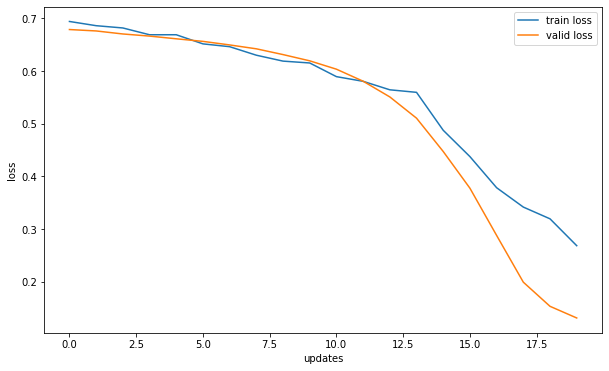

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
ax  = fig.add_subplot(1, 1, 1)
ax.plot(train_losses, label = 'train loss')
ax.plot(valid_losses, label = 'valid loss')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('loss')

Text(0, 0.5, 'acc')

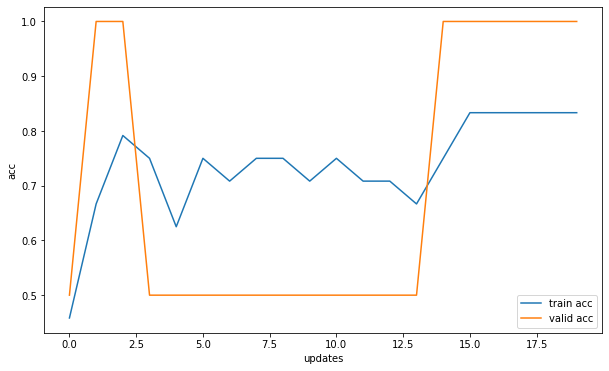

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax  = fig.add_subplot(1, 1, 1)
ax.plot(train_accs, label = 'train acc')
ax.plot(valid_accs, label = 'valid acc')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('acc')

In [ ]:
model.load_state_dict(torch.load('../models/DEAP_BiLSTM.pt'))
test_loss, test_acc = evaluate(model, test_loader, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')